In [3]:
### compute counts and perc
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42

dic_clade = {}
with open("/home/mouren/Data/age_genes/clades_names_Trigos2017.csv") as f:
    first = True
    for line in f:
        if first is True:
            first = False
            continue
        else:
            dic_clade[line.strip().split("\t")[0]] = line.strip().split("\t")[1]
            
#list of exons with the less and most nr tf on them 
ee_least_tf = []
ee_most_tf = []

with open("/mnt/project/exonhancer/ZENODO_REPO/Conservation_and_structure/summary_files/grouped_by_tf/ee_grouped_tf_hg") as f:
    for line in f:
        if int(line.strip().split()[1]) == 1:
            ee_least_tf.append(line.strip().split()[0])
        elif int(line.strip().split()[1]) == 10:
            ee_most_tf.append(line.strip().split()[0])

# counts and cats
count_ee = {}
cat_ee = {}
cat_ee_least = {}
cat_ee_most = {}
total_ee = 0
total_ee_least = 0
total_ee_most = 0
with open("/home/mouren/Data/age_genes/ee_age_genes.tsv") as f:
    first = True
    for line in f:
        if first :
            first = False
            continue      

        if line.strip().split("\t")[4] != "NA":
            total_ee += 1
            if line.strip().split("\t")[4] not in count_ee:
                count_ee[line.strip().split("\t")[4]] = 1
            else:
                count_ee[line.strip().split("\t")[4]] += 1

            if line.strip().split("\t")[5] not in cat_ee:
                cat_ee[line.strip().split("\t")[5]] = 1
            else:
                cat_ee[line.strip().split("\t")[5]] += 1

            if line.strip().split("\t")[0] in ee_least_tf:
                total_ee_least += 1
                if line.strip().split("\t")[5] not in cat_ee_least:
                    cat_ee_least[line.strip().split("\t")[5]] = 1
                else:
                    cat_ee_least[line.strip().split("\t")[5]] += 1
            
            elif line.strip().split("\t")[0] in ee_most_tf:
                total_ee_most += 1
                if line.strip().split("\t")[5] not in cat_ee_most:
                    cat_ee_most[line.strip().split("\t")[5]] = 1
                else:
                    cat_ee_most[line.strip().split("\t")[5]] += 1       

#perc 
perc_cat_ee = {key: (x/total_ee)*100 for key,x in cat_ee.items()}
perc_cat_ee_least = {key: (x/total_ee_least)*100 for key,x in cat_ee_least.items()}
perc_cat_ee_most = {key: (x/total_ee_most)*100 for key,x in cat_ee_most.items()}

# order in correct way 
order_cat = ["UC","EM","MM"]
sorted_cat_ee = {category: perc_cat_ee[category] for category in order_cat}
sorted_cat_ee_least = {category: perc_cat_ee_least[category] for category in order_cat}
sorted_cat_ee_most = {category: perc_cat_ee_most[category] for category in order_cat}

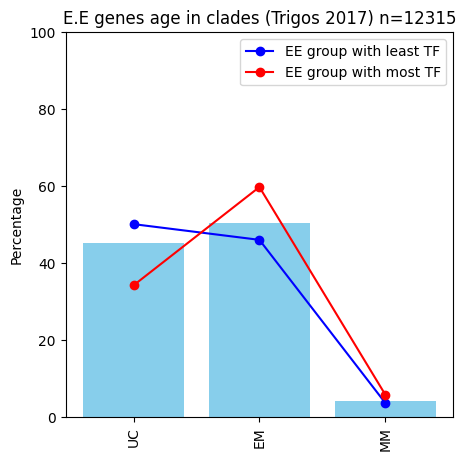

In [ ]:
#ee cat with exons by number of tf (the least and most) 
plt.figure(figsize=(5, 5))
plt.bar(list(sorted_cat_ee.keys()), list(sorted_cat_ee.values()), color='skyblue')
plt.plot(list(sorted_cat_ee_least.keys()), list(sorted_cat_ee_least.values()), color='blue', marker='o', label='EE group with least TF')
plt.plot(list(sorted_cat_ee_most.keys()), list(sorted_cat_ee_most.values()), color='red', marker='o', label='EE group with most TF')

plt.legend()
plt.ylim((0,100))
plt.ylabel("Percentage")
plt.xticks(rotation=90)
plt.title(label="E.E genes age in clades (Trigos 2017) n="+str(total_ee), fontdict=None, loc='center', pad=None)
plt.savefig("/home/mouren/Images/tls1/2.description_EE/age_genes_clades_Trigos2017/age_genes_EE_and_nbTF_cat_trigos2017.pdf", format="pdf", bbox_inches="tight")
plt.show()